# Model `BinaryMFThresholdExSigmoidColumnwise`

In [19]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


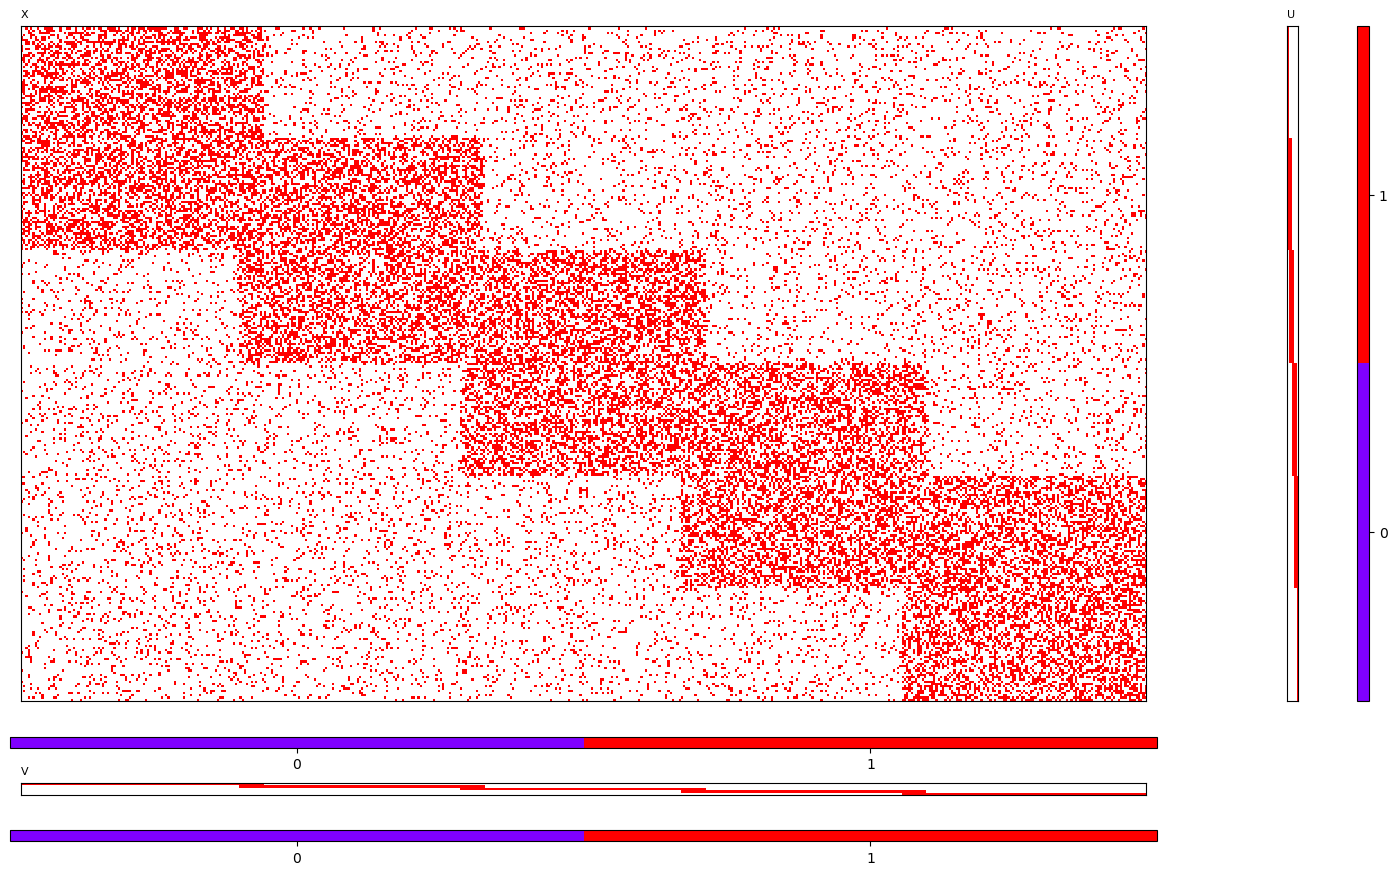

<Figure size 640x480 with 0 Axes>

In [20]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.6, 0.1], seed=2000)
data.show_matrix()

In [21]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [22]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 23727
[I]   val_size     : 3390
[I]   test_size    : 6780
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 116103
[I]   n_negatives  : 33897
[I]   train_size   : 23727
[I]   val_size     : 3390
[I]   test_size    : 6780
[I]   seed         : 2023


In [23]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 10

# Init with `NMFSklearn`

The thresholding gap can be relatively wide if you init with `NMFSklearn` followed by `BinaryMFPenalty`, as the factors are already near-binary.

[I] k            : 10
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


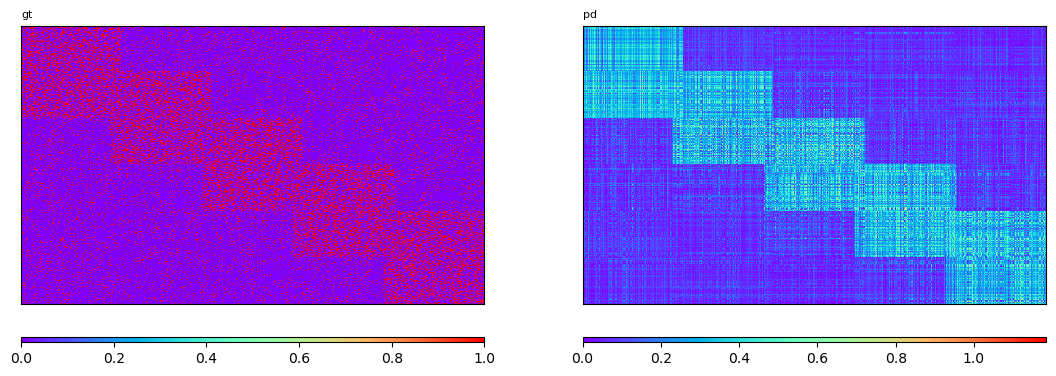

[I] model saved as: 24-06-22_21-43-30_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [24]:
from models import NMFSklearn, BinaryMFPenalty

reg = 1
reg_growth = 3

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

U, V = model_nmf.U, model_nmf.V

# Init with `WNMF`

In [25]:
# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# Shared params

In [26]:
us, vs = 0.1, 0.1
u, v = us, vs

# W = 'full'
W = 'mask'

init_method = 'custom'
link_lamda = 10
task = 'reconstruction'

# `BinaryMFThreshold`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : mask
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1719063810
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.4946058597045935] -> [0.0, 0.9999999999999999], V: [0.0, 1.2013594622457584] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [194686.473, 220445.075]
[I] iter: 2, start: [0.286, 0.310], direction: [-7166.209, -15870.194]
[I] iter: 3, start: [0.231, 0.189], direction: [13998.005, 16260.754]
[I] iter: 4, start: [0.284, 0.251], direction: [-4783.349, -8767.981]
[I] iter: 5, start: [0.266, 0.218], direction: [2237.567, -1413.275]
[I] iter: 6, start: [0.300, 0.196], direction: [-3317.255, -3641.985]
[I] iter: 7, start: [0.294, 0.189], direction: [985.894, -515.787]
[I

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   22/06/24 09:43:30    0  0.100000  0.100000  23719.655914  0.865048   
1   22/06/24 09:43:30    1  0.285667  0.310233   8653.901556  0.311628   
2   22/06/24 09:43:31    2  0.230994  0.189153   8137.762476  0.602099   
3   22/06/24 09:43:31    3  0.284392  0.251183   7885.909207  0.426982   
4   22/06/24 09:43:31    4  0.266145  0.217735   7720.399218  0.506764   
5   22/06/24 09:43:31    5  0.300287  0.196171   7631.223658  0.497029   
6   22/06/24 09:43:32    6  0.293960  0.189224   7609.402985  0.522106   
7   22/06/24 09:43:32    7  0.297721  0.187257   7607.225403  0.520125   
8   22/06/24 09:43:32    8  0.296713  0.185835   7606.373382  0.524086   
9   22/06/24 09:43:32    9  0.298711  0.183786   7605.994394  0.524002   
10  22/06/24 09:43:32   10  0.297870  0.183263   7605.776587  0.525435   
11  22/06/24 09:43:33   11  0.298321  0.183111   7605.762392  0.525435   
12  22/06/24 09:43:33   12  0.298126  0.182921   7605.743451  0.525983   
13  22/06/24 09:43:33   13  0.298435  0.182650   7605.737737  0.526278   
14  22/06/24 09:43:33   14  0.298280  0.182549   7605.730093  0.526278   
15  22/06/24 09:43:33   15  0.298369  0.182511   7605.729324  0.526278   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
1   0.407360  0.819400  0.353121  0.207670  0.038786  0.865780  0.065364   
2   0.343372  0.754933  0.437335  0.489971  0.039923  0.722180  0.073830   
3   0.385884  0.801873  0.405394  0.309735  0.039994  0.816373  0.070841   
4   0.367022  0.783733  0.425719  0.389086  0.040261  0.776580  0.072972   
5   0.366072  0.784293  0.421615  0.382006  0.040199  0.779900  0.072743   
6   0.359949  0.777553  0.426122  0.407080  0.040098  0.766360  0.073004   
7   0.359335  0.777407  0.425031  0.407965  0.040269  0.766880  0.073303   
8   0.358502  0.776380  0.425761  0.413274  0.040391  0.764840  0.073590   
9   0.358630  0.776473  0.425824  0.412094  0.040297  0.764907  0.073414   
10  0.358247  0.776047  0.426026  0.413569  0.040287  0.764093  0.073422   
11  0.358247  0.776047  0.426026  0.413569  0.040287  0.764093  0.073422   
12  0.358199  0.775947  0.426171  0.413864  0.040269  0.763833  0.073396   
13  0.358102  0.775847  0.426199  0.413864  0.040235  0.763640  0.073340   
14  0.358102  0.775847  0.426199  0.413864  0.040235  0.763640  0.073340   
15  0.358102  0.775847  0.426199  0.413864  0.040235  0.763640  0.073340   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   0.793363  0.059871  0.427567  0.111340  
1   0.206490  0.077131  0.852460  0.112310  
2   0.493068  0.080351  0.722007  0.138183  
3   0.306195  0.079074  0.807453  0.125689  
4   0.387906  0.080278  0.771460  0.133026  
5   0.375074  0.078938  0.773940  0.130427  
6   0.402360  0.079265  0.761733  0.132440  
7   0.401917  0.079344  0.762173  0.132526  
8   0.406047  0.079369  0.760267  0.132783  
9   0.404867  0.079180  0.760280  0.132455  
10  0.406785  0.079253  0.759573  0.132660  
11  0.406785  0.079253  0.759573  0.132660  
12  0.407227  0.079246  0.759340  0.132673  
13  0.407227  0.079180  0.759147  0.132581  
14  0.407227  0.079180  0.759147  0.132581  
15  0.407227  0.079180  0.759147  0.132581

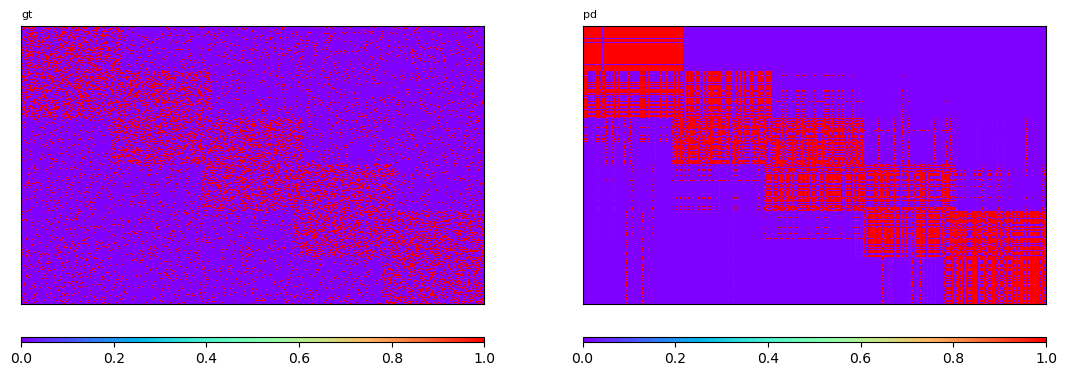

[I] model saved as: 24-06-22_21-43-34_BinaryMFThreshold.pickle


<Figure size 640x480 with 0 Axes>

In [27]:
from models import BinaryMFThreshold

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoid`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : mask
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1719063814
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.4946058597045935] -> [0.0, 0.9999999999999999], V: [0.0, 1.2013594622457584] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [2545.236, 2011.476]
[I] iter: 2, start: [0.255, 0.223], direction: [-611.086, -937.451]
[I] iter: 3, start: [0.181, 0.108], direction: [522.708, 444.413]
[I] iter: 4, start: [0.213, 0.135], direction: [34.794, 121.317]
[I] iter: 5, start: [0.215, 0.143], direction: [15.303, -168.934]
[I] iter: 6, start: [0.215, 0.138], direction: [53.457, 61.821]
[I] iter: 7, start: [0.219, 0.141], direction: [115.728, -103.791]
[I] it

train  \
                                                                    0   
                 time iter         u         v            F    Recall   
0   22/06/24 09:43:34    0  0.100000  0.100000  7621.633689  0.865048   
1   22/06/24 09:43:35    1  0.255349  0.222771  7286.632017  0.513634   
2   22/06/24 09:43:35    2  0.180753  0.108336  6729.993428  0.764572   
3   22/06/24 09:43:35    3  0.212657  0.135461  6592.657448  0.700089   
4   22/06/24 09:43:36    4  0.214781  0.142865  6591.516906  0.687192   
5   22/06/24 09:43:36    5  0.215248  0.137710  6589.516291  0.694483   
6   22/06/24 09:43:36    6  0.218510  0.141483  6587.261858  0.685801   
7   22/06/24 09:43:37    7  0.232637  0.128813  6586.378260  0.689594   
8   22/06/24 09:43:37    8  0.222490  0.136579  6580.449921  0.691491   
9   22/06/24 09:43:37    9  0.227934  0.138210  6574.987287  0.682514   
10  22/06/24 09:43:38   10  0.226962  0.138019  6574.923342  0.684157   
11  22/06/24 09:43:38   11  0.227539  0.138135  6574.899408  0.683483   
12  22/06/24 09:43:39   12  0.227202  0.138070  6574.891592  0.684157   
13  22/06/24 09:43:39   13  0.227401  0.138110  6574.888783  0.683483   
14  22/06/24 09:43:39   14  0.227284  0.138087  6574.887824  0.684157   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
1   0.366273  0.782493  0.427614  0.397935  0.040543  0.773567  0.073589   
2   0.277955  0.648593  0.407695  0.690560  0.035869  0.573507  0.068195   
3   0.308824  0.704713  0.428588  0.614454  0.038726  0.646587  0.072860   
4   0.313932  0.712967  0.430979  0.591740  0.038623  0.657893  0.072513   
5   0.311170  0.708493  0.429775  0.607080  0.038863  0.651807  0.073050   
6   0.314635  0.714000  0.431366  0.589676  0.038653  0.659273  0.072550   
7   0.312270  0.710667  0.429878  0.595575  0.038533  0.655007  0.072382   
8   0.311974  0.709973  0.429964  0.601475  0.038771  0.653980  0.072846   
9   0.315728  0.715800  0.431736  0.587906  0.038857  0.662033  0.072896   
10  0.314862  0.714553  0.431253  0.591150  0.038870  0.660413  0.072944   
11  0.315389  0.715253  0.431613  0.588791  0.038818  0.661220  0.072835   
12  0.314862  0.714553  0.431253  0.591150  0.038870  0.660413  0.072944   
13  0.315389  0.715253  0.431613  0.588791  0.038818  0.661220  0.072835   
14  0.314862  0.714553  0.431253  0.591150  0.038870  0.660413  0.072944   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   0.793363  0.059871  0.427567  0.111340  
1   0.393658  0.080215  0.768567  0.133273  
2   0.680236  0.070665  0.581187  0.128029  
3   0.603097  0.076021  0.650733  0.135022  
4   0.586578  0.076572  0.661573  0.135461  
5   0.595723  0.076272  0.655620  0.135231  
6   0.585841  0.076803  0.662980  0.135802  
7   0.589381  0.076264  0.658767  0.135052  
8   0.593510  0.076515  0.657847  0.135554  
9   0.582891  0.077051  0.665553  0.136109  
10  0.584956  0.076926  0.663973  0.135971  
11  0.584071  0.077014  0.664807  0.136085  
12  0.584956  0.076926  0.663973  0.135971  
13  0.584071  0.077014  0.664807  0.136085  
14  0.584956  0.076926  0.663973  0.135971

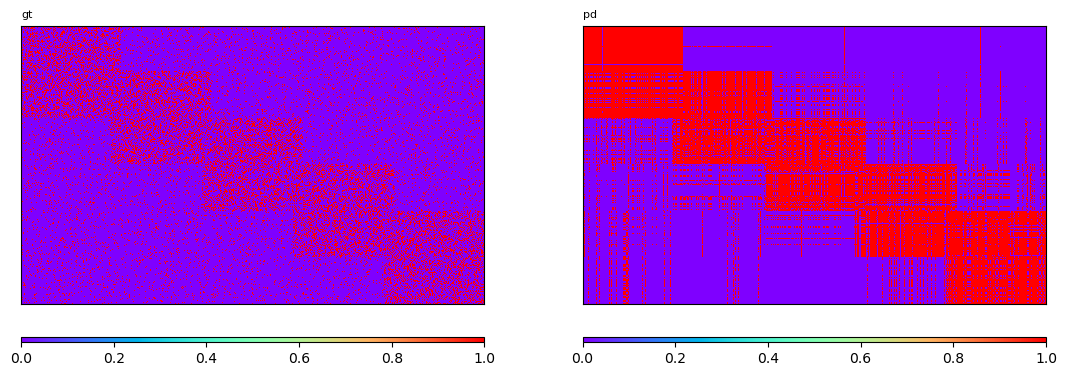

[I] model saved as: 24-06-22_21-43-40_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [28]:
from models import BinaryMFThresholdExSigmoid

model = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W=W, u=u, v=v, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExColumnwise`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : mask
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] solver       : line-search
[I] seed         : 1719064350
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.4946058597045935] -> [0.0, 0.9999999999999999], V: [0.0, 1.2013594622457584] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[I] iter: 4
[I] iter: 5
[I] iter: 6
[I] iter: 7
[I] iter: 8
[I] iter: 9
[W] Stopped in advance: Difference lower than threshold


\
                                                                               
                time iter                                                 us   
0  22/06/24 09:52:32    0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...   
1  22/06/24 09:52:32    1  [0.6822202400969593, 0.5733881547133862, 0.612...   
2  22/06/24 09:52:32    2  [0.99999, 0.99999, 0.99999, 0.99999, 0.99999, ...   
3  22/06/24 09:52:32    3  [0.968374632530584, 0.9555304091091521, 0.9629...   
4  22/06/24 09:52:33    4  [0.9809812623465617, 0.9672192559901375, 0.969...   
5  22/06/24 09:52:33    5  [0.972882098426748, 0.9753418651736275, 0.9567...   
6  22/06/24 09:52:33    6  [0.9769614969178788, 0.9734399069694716, 0.962...   
7  22/06/24 09:52:33    7  [0.9765419938035199, 0.9727849713945712, 0.962...   
8  22/06/24 09:52:33    8  [0.976656066748441, 0.9728108961664336, 0.9628...   
9  22/06/24 09:52:34    9  [0.9765942721939276, 0.9727561618207804, 0.962...   

                                                                       train  \
                                                                           0   
                                                  vs             F    Recall   
0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...  67541.864237  0.865048   
1  [0.5269977586325079, 0.6427952726294505, 0.606...  23665.055576  0.865048   
2  [0.99999, 0.99999, 0.99999, 0.99999, 0.99999, ...   6267.746364  0.865048   
3  [0.9683795311356429, 0.9555303882745612, 0.962...   5649.209450  0.865048   
4  [0.9809991858004414, 0.9672189833480823, 0.969...   5619.534585  0.865048   
5  [0.9729084435689137, 0.9753419954433411, 0.956...   5617.154288  0.865048   
6  [0.9769938277022902, 0.9734401121016062, 0.962...   5614.135401  0.865048   
7  [0.9765792490668334, 0.9727852865455353, 0.962...   5614.040122  0.865048   
8  [0.9766983591844649, 0.972811327077638, 0.9628...   5614.036085  0.865048   
9  [0.9766465627002262, 0.9727568279321971, 0.962...   5614.035870  0.865048   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
1  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
2  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
3  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
4  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
5  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
6  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
7  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
8  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
9  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   

       test                               
          0                               
     Recall Precision  Accuracy       F1  
0  0.793363  0.059871  0.427567  0.11134  
1  0.793363  0.059871  0.427567  0.11134  
2  0.793363  0.059871  0.427567  0.11134  
3  0.793363  0.059871  0.427567  0.11134  
4  0.793363  0.059871  0.427567  0.11134  
5  0.793363  0.059871  0.427567  0.11134  
6  0.793363  0.059871  0.427567  0.11134  
7  0.793363  0.059871  0.427567  0.11134  
8  0.793363  0.059871  0.427567  0.11134  
9  0.793363  0.059871  0.427567  0.11134

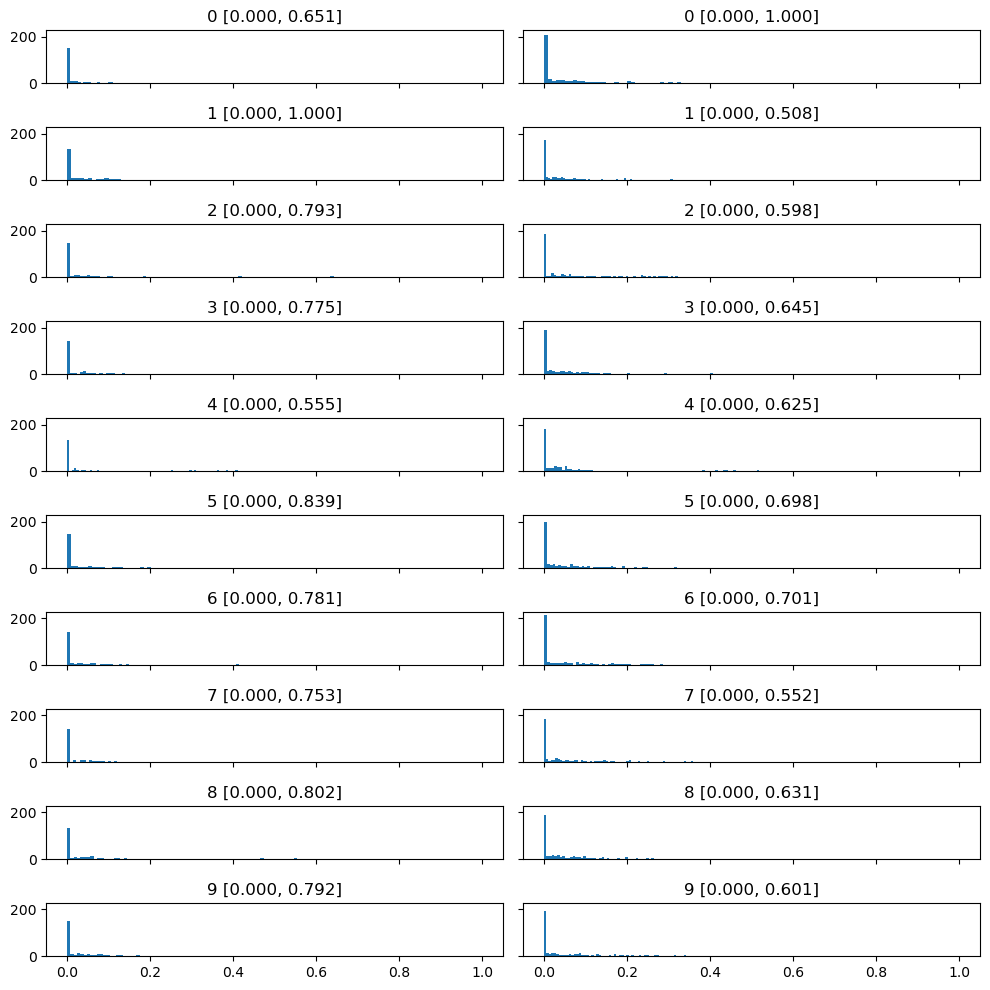

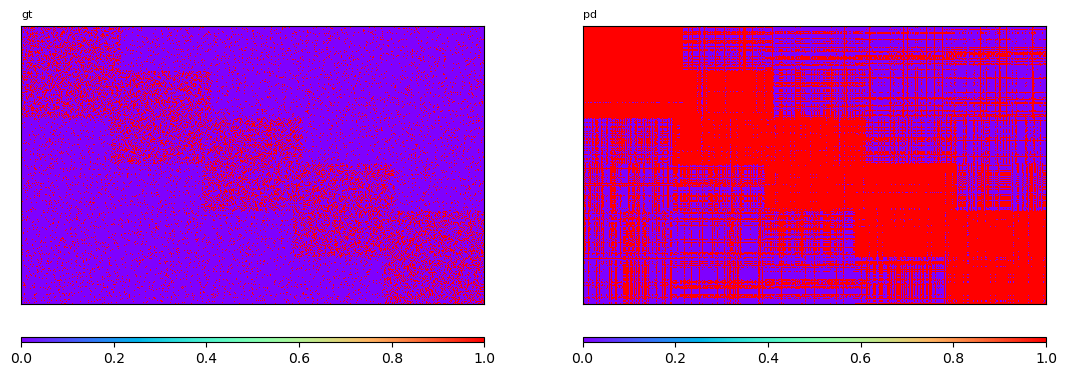

[I] model saved as: 24-06-22_21-52-37_BinaryMFThresholdExColumnwise.pickle


<Figure size 640x480 with 0 Axes>

In [31]:
from models import BinaryMFThresholdExColumnwise

solver = 'line-search'
lamda = 10

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, solver=solver, lamda=lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoidColumnwise`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : mask
[I] us           : 0.1
[I] vs           : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1719063821
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.4946058597045935] -> [0.0, 0.9999999999999999], V: [0.0, 1.2013594622457584] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[W] Stopped in advance: Difference lower than threshold


\
                                                                               
                time iter                                                 us   
0  22/06/24 09:43:42    0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...   
1  22/06/24 09:43:42    1  [0.5855692545983511, 0.7519672175667075, 0.832...   
2  22/06/24 09:43:43    2  [0.5855692546024474, 0.7520258471888629, 1.023...   
3  22/06/24 09:43:44    3  [0.5855692546024474, 0.7520258471888629, 1.023...   

                                                                      train  \
                                                                          0   
                                                  vs            F    Recall   
0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...  7621.633689  0.865048   
1  [0.4218529430233333, 0.4811655674236742, 0.423...  7981.761369  0.865048   
2  [0.4218529430249668, 0.48116556742367855, 0.42...  7931.494851  0.829856   
3  [0.4218529430249668, 0.48116556742367855, 0.42...  7936.176691  0.829856   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
1  0.228454  0.516533  0.361451  0.800885  0.030219  0.414647  0.058241   
2  0.233255  0.541593  0.364154  0.766077  0.030765  0.449267  0.059154   
3  0.233255  0.541593  0.364154  0.766077  0.030765  0.449267  0.059154   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.793363  0.059871  0.427567  0.111340  
1  0.793363  0.059871  0.427567  0.111340  
2  0.751622  0.060369  0.459987  0.111762  
3  0.751622  0.060369  0.459987  0.111762

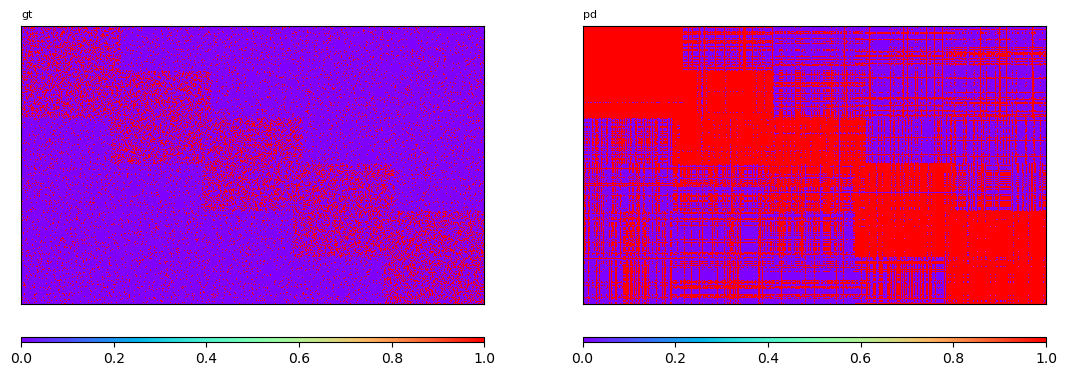

[I] model saved as: 24-06-22_21-43-45_BinaryMFThresholdExSigmoidColumnwise.pickle


<Figure size 640x480 with 0 Axes>

In [30]:
from models import BinaryMFThresholdExSigmoidColumnwise

lamda = 100

model = BinaryMFThresholdExSigmoidColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, lamda=lamda, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)